### **Imports**

In [3]:
import os

os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"

import tensorflow as tf

tf.config.experimental.set_memory_growth(
    tf.config.list_physical_devices("GPU")[0], True
)

In [4]:
import keras
import pandas as pd

In [5]:
import sys

sys.path.insert(1, r"/home/srajan/SRAJAN/Python/NLP/Eng_Hin_LLM/group_1/")
sys.path.insert(2, r"/home/srajan/SRAJAN/Python/NLP/Eng_Hin_LLM/group_2/")
sys.path.insert(3, r"/home/srajan/SRAJAN/Python/NLP/Eng_Hin_LLM/group_3/")
from data_preprocessing import *
from data_interpretation import *
from data_wordcloud import *
from data_tokenize import *
from varNsplit import *
from model import *
from eval_plots import *
from eval_predict import *

/home/srajan/miniconda3/envs/try/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Loading Data**

In [6]:
data = pd.read_csv("eng_hin_data.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)

### **Data Interpretation**

In [7]:
interpretation = data_interpretation(data)

Data Shape:
(177606, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177606 entries, 0 to 177605
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  177604 non-null  object
 1   Hindi    177606 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


Missing Values:
English    2
Hindi      0
dtype: int64

Duplicates: 2841

'Descriptive Statistics:'

,English,Hindi
count,177604,177606
unique,174076,147327
top,(Laughter),(हँसी)
freq,555,212


### **Data Handling**

In [8]:
data = drop(data)

Data Sample

In [9]:
data.sample(5)

,English,Hindi
103781,however the terms of service you tube,हालांकि यूटयूब की सेवा की शर्तें
169429,Nationwide lakhs of people have set for tourism .,देश भर में लाखों लोग पर्यटन पर निकल चुके हैं ।
29379,With the cooperation of Ministry of Non-conven...,भारत सरकार के अपारम्परिक ऊर्जा स्रोत मंत्रालय ...
159190,"Bhopal , Indore , Jabalpur , Gwalior are the m...","भोपाल , इंदौर , जबलपुर , ग्वालियर मध्यप्रदेश क..."
173154,The attraction of this aspect of nature is so ...,प्रकृति के इस रूप का आकर्षण इतना प्रबल होता है...


**Data Pre-Processing**

In [10]:
data["English"] = data["English"].apply(remove_html_tags)
data["English"] = data["English"].apply(remove_url)
data["Hindi"] = data["Hindi"].apply(remove_url)
data["English"] = data["English"].apply(expand_contractions)

In [11]:
data["English"] = data["English"].apply(
    lambda x: preprocess_text(x, language="english")
)
data["Hindi"] = data["Hindi"].apply(lambda x: preprocess_text(x, language="hindi"))

Data Sample

In [12]:
data.sample(5)

,English,Hindi
99348,As often happens in these circumstances local...,जगह जगह नेता पैदा हो गये और फिलहाल उनकी हिदायत...
38720,They have to pass through in our own courts ha...,जो लोग हमारे न्यायालयों में न्याय की खोज में आ...
151650,According to the chairman of Cancer Preventio...,कैंसर प्रिवेंशन कोलिशन के चेयरमैन सैम एपस्टीन ...
138631,How many children are alive and how many have ...,कितने बच्चे जीवित हैं कितने बच्चों की मृत्यु ...
112290,External source,बाह्यसूत्र


In [13]:
eng_sentences = data["English"].to_list()
hindi_sentences = data["Hindi"].to_list()

**Word Cloud**

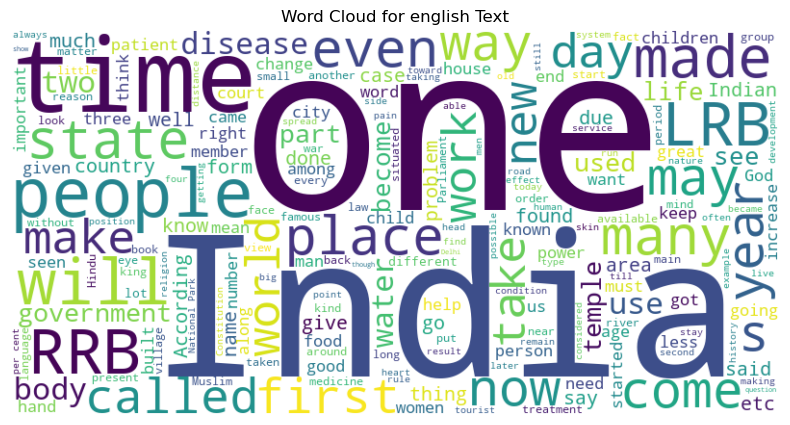

In [14]:
generate_wordcloud(data["English"], "english")

**Data Tokenization**

In [15]:
data, tok_eng, tok_hindi = tokenize(data)

(164770, 2)


**Data Padding**

In [16]:
x, y = padding(data, tok_eng, tok_hindi)

In [17]:
print(x)

[[3990   49   19 ...    0    0    0]
 [2086   53    5 ...    0    0    0]
 [   8 3295    6 ...    0    0    0]
 ...
 [  33 1317  139 ...    0    0    0]
 [  22   14   75 ...    0    0    0]
 [1981 4188  122 ...    0    0    0]]

In [18]:
print(y)

[[    1 12758     3 ...     0     0     0]
 [    1  1185   143 ...     0     0     0]
 [    1    17   231 ...     0     0     0]
 ...
 [    1   227   817 ...     0     0     0]
 [    1   475     5 ...     0     0     0]
 [    1   171    55 ...     0     0     0]]

### **Model Building**

**Data Train-Test Split**

In [19]:
x_train, x_test, y_train, y_test = split(x, y)

Shape of x_train: (131816, 264)
Shape of x_test: (32954, 264)
Shape of y_train: (131816, 264)
Shape of y_test: (32954, 264)


**Model Variables**

In [20]:
max_length_input, max_length_output, input_vocab_size, output_vocab_size = (
    modelVariables(x_train, x_test, y_train, y_test, [tok_eng, tok_hindi])
)

max_length_input: 264
max_length_output: 264
input_vocab_size: 78327
output_vocab_size: 87868


**Model Architecture**

In [19]:
easyAnuvad = build_model(
    input_vocab_size, output_vocab_size, max_length_input, max_length_output
)

I0000 00:00:1728750115.110990  376692 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728750115.111122  376692 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728750115.111175  376692 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728750115.160713  376692 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [20]:
easyAnuvad.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 264)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 264)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 264, 260)  │ 20,365,020 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 264, 260)  │ 22,845,680 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 264,      │    260,208 │ embedding[0][0]   │
│                     │ 156), (None,      │            │                   │
│                     │ 156), (None,      │            │                   │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 264,      │    260,208 │ embedding_1[0][0… │
│                     │ 156), (None,      │            │ lstm[0][1],       │
│                     │ 156), (None,      │            │ lstm[0][2]        │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, 264, 156)  │    160,668 │ lstm[0][0],       │
│ (MultiHeadAttentio… │                   │            │ lstm_1[0][0],     │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 264, 312)  │          0 │ lstm_1[0][0],     │
│ (Concatenate)       │                   │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 264,       │ 27,502,684 │ concatenate[0][0] │
│                     │ 87868)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 71,394,468 (272.35 MB)

 Trainable params: 71,394,468 (272.35 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [21]:
history = train_model(easyAnuvad, x_train, y_train, x_test, y_test)

Epoch 1/3


2024-10-12 19:46:18.581473: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


4120/4120 ━━━━━━━━━━━━━━━━━━━━ 2125s 515ms/step - accuracy: 0.9399 - loss: 1.1578 - val_accuracy: 0.9640 - val_loss: 0.2776
Epoch 2/3
4120/4120 ━━━━━━━━━━━━━━━━━━━━ 2093s 508ms/step - accuracy: 0.9677 - loss: 0.2464 - val_accuracy: 0.9762 - val_loss: 0.1789
Epoch 3/3
4120/4120 ━━━━━━━━━━━━━━━━━━━━ 2165s 525ms/step - accuracy: 0.9790 - loss: 0.1511 - val_accuracy: 0.9886 - val_loss: 0.0862


In [41]:
easyAnuvad.save("models/eng-hindi-tl-final.h5")
easyAnuvad.save("models/eng-hindi-tl-final.keras")
print("Model saved succesfully!!")

Model saved succesfully!!

### **Model Evaluation**

**Plots**

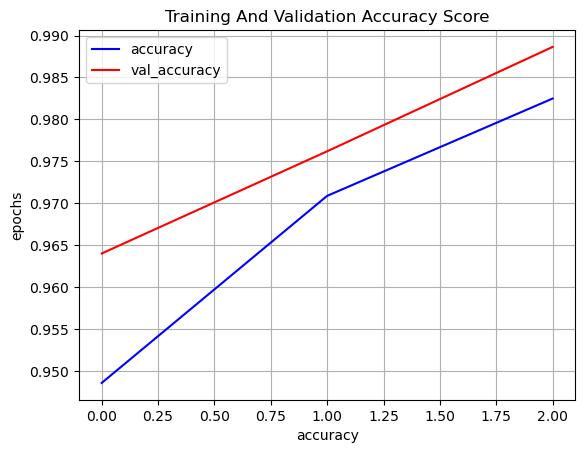

In [22]:
evaluationPlotAccuracy(history)

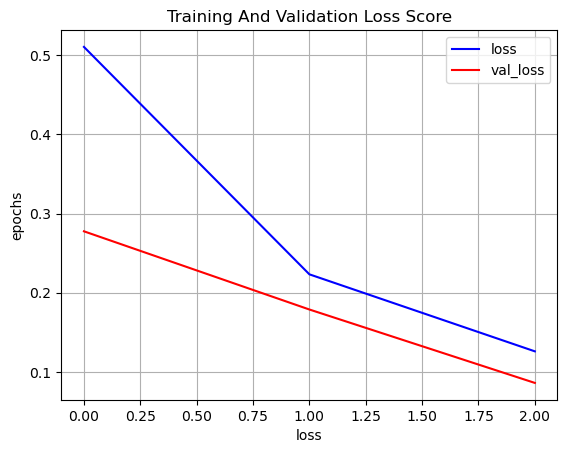

In [23]:
evaluationPlotLoss(history)

**Model Prediction**

In [21]:
easyAnuvad = keras.models.load_model("models/eng-hindi-tl-final.keras")

I0000 00:00:1730828043.798215   17016 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730828043.798333   17016 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730828043.798375   17016 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730828043.850338   17016 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [22]:
rev_tok_english = get_rev_token_dict(tok_eng)
rev_tok_hindi = get_rev_token_dict(tok_hindi)

In [31]:
x_test_subset, y_test_padded_subset = select_test_subset(x_test, y_test, num_samples=10)

In [32]:
predictions = predict_translations(easyAnuvad, x_test_subset, y_test_padded_subset)
predicted_tokens_np = convert_predictions_to_tokens(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Shape of predictions:
(9, 264, 87868)

Shape of predicted_tokens:
(9, 264)

In [33]:
predicted_sentences = map_indices_to_tokens(
    predicted_tokens_np, rev_tok_hindi, tok_hindi
)
english_sentences = map_sentences(x_test_subset, rev_tok_english)
print_translations(english_sentences, predicted_sentences)

'English sentence 1: a cricket which is often the prey is a monster when compared with the digger wasp and cannot therefore be easily transported to a specially prepared nest'

'Predicted Hindi translation 1: श्रेणीधर्म की तुलना में उसका शिकार जो प्राय बैंकाक होता है एक सैंडविच है और इसलिए उसे विशेष रूप से बनाए गए नीड़ में ले जाना आसान काम नहीं है'

'English sentence 2: up to the middle of the fifties the development of indian shipping and shipbuilding industries had been limited they needed considerable acceleration'

'Predicted Hindi translation 2: दलदल दशक के मध्य तक भारतीय चालुक़्य और रेखाएं निर्माण उद्योगों का विकास सीमित पीउ और अधिक गति से खुराक की आवश्यकता थी'

'English sentence 3: and language is actually a problem here'

'Predicted Hindi translation 3: और भाषा यहाँ पे एक समस्या है'

'English sentence 4: also feelings that are clouding the issues'

'Predicted Hindi translation 4: साथ ही साथ पश्चात जो आरोग्य कर रही हैं जैसे की'

'English sentence 5: this is indias largest state'

'Predicted Hindi translation 5: यह भारत का सबसे बड़ा राज्य है।'

'English sentence 6: breast feeding is not just a life saving elixir but it is also a life savior for the mother'

'Predicted Hindi translation 6: स्तनपान नील आरोग्य कथाओं ही नहीं बल्कि सुनकर के लिए भी चौथे है ।'

'English sentence 7: punjabi'

'Predicted Hindi translation 7: ऑनलाइन'

'English sentence 8: ranchi can be reached through air route easily from kolkata delhi mumbai and patna'

'Predicted Hindi translation 8: टिहरी कोलकाता दिल्ली मुंबई और कर्नाटक से हवाई मार्ग से आसानी से पहुँचा जा सकता है ।'

'English sentence 9: i think they were given to tedsters in a box'

'Predicted Hindi translation 9: मुझे लगता है वे एक बॉक्स में दरवाजे को दिये गये थे'

**Model Scoring**

In [30]:
import difflib
from tqdm import tqdm
import multiprocessing as mp


def find_closest_match(sentence, sentence_list, n=1, cutoff=0.6):
    matches = difflib.get_close_matches(sentence, sentence_list, n=n, cutoff=cutoff)
    return matches[0] if matches else None


def process_sentence(sentence):
    closest_match = find_closest_match(sentence, eng_sentences)
    if closest_match:
        return hindi_sentences[eng_sentences.index(closest_match)]
    else:
        return None  # or handle the case where no close match is found


if __name__ == "__main__":
    with mp.Pool(mp.cpu_count()) as pool:
        hindi_test_sentences = list(
            tqdm(
                pool.imap(process_sentence, english_sentences),
                total=len(english_sentences),
            )
        )

100%|██████████| 9/9 [00:19<00:00,  2.17s/it]


In [31]:
hindi_test_sentences

['खनकबर्र की तुलना में उसका शिकार  जो प्राय  झींगुर होता है  एक दैत्य है और इसलिए उसे विशेष रूप से बनाए गए नीड़ में ले जाना आसान काम नहीं है ',
 'पांचवें दशक के मध्य तक  भारतीय जहाजरानी और जलपोत निर्माण उद्योगों का विकास सीमित रहाइनको और अधिक गति से बढ़ाने की आवश्यकता थी ',
 'और भाषा यहाँ पे एक समस्या है',
 'साथ ही साथ भावनाए जो धुंधला कर रही हैं जैसे की ',
 'यह भारत का सबसे बड़ा राज्य है।',
 'स्तनपान सिर्फ़ प्राणदायक अमृत ही नहीं बल्कि जननी के लिए भी प्राणरक्षक है ।',
 'पंजाबी',
 'रांची कोलकाता  दिल्ली  मुंबई और पटना से हवाई मार्ग से आसानी से पहुँचा जा सकता है ।',
 'मुझे लगता है वे एक बॉक्स में प्रवक्ताओ को दिये गये थे']

In [32]:
predicted_sentences

['श्रेणीधर्म की तुलना में उसका शिकार जो प्राय बैंकाक होता है एक सैंडविच है और इसलिए उसे विशेष रूप से बनाए गए नीड़ में ले जाना आसान काम नहीं है',
 'दलदल दशक के मध्य तक भारतीय चालुक़्य और रेखाएं निर्माण उद्योगों का विकास सीमित पीउ और अधिक गति से खुराक की आवश्यकता थी',
 'और भाषा यहाँ पे एक समस्या है',
 'साथ ही साथ पश्चात जो आरोग्य कर रही हैं जैसे की',
 'यह भारत का सबसे बड़ा राज्य है।',
 'स्तनपान नील आरोग्य कथाओं ही नहीं बल्कि सुनकर के लिए भी चौथे है ।',
 'ऑनलाइन',
 'टिहरी कोलकाता दिल्ली मुंबई और कर्नाटक से हवाई मार्ग से आसानी से पहुँचा जा सकता है ।',
 'मुझे लगता है वे एक बॉक्स में दरवाजे को दिये गये थे']

In [40]:
bleu_scoring(hindi_test_sentences, predicted_sentences)

BLEU scores: 
{
    'bleu': 0.6522024116712678,
    'precisions': [0.8442622950819673, 0.7256637168141593, 0.6095238095238096, 0.4845360824742268],
    'brevity_penalty': 1.0,
    'length_ratio': 1.0,
    'translation_length': 122,
    'reference_length': 122
}